## Clustering


## Import and drop unwanted columns

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn import set_config

In [2]:
# Import datas
data = pd.read_csv('../2_data cleaning/Cleaned_data.csv')

# Save Attrition columns for Probability estimation
attrition_flag = data['Attrition_Flag']

data = data.drop(['Unnamed: 0','Attrition_Flag'], axis=1)

# data.head()
# attrition_flag.head()
data.dtypes

Customer_Age                        int64
Gender                              int64
Dependent_count                     int64
Marital_Status                      int64
Months_on_book                      int64
Total_Relationship_Count            int64
Months_Inactive_12_mon              int64
Contacts_Count_12_mon               int64
Credit_Limit                      float64
Total_Revolving_Bal                 int64
Total_Amt_Chng_Q4_Q1              float64
Total_Trans_Amt                     int64
Total_Trans_Ct                      int64
Total_Ct_Chng_Q4_Q1               float64
Avg_Utilization_Ratio             float64
Education_Level_College             int64
Education_Level_Doctorate           int64
Education_Level_Graduate            int64
Education_Level_High School         int64
Education_Level_Post-Graduate       int64
Education_Level_Uneducated          int64
Education_Level_Unknown             int64
Income_Category_$120K +             int64
Income_Category_$40K - $60K       

In [3]:
# Select columns for KMeans model
# data = data[['Customer_Age','Gender','Dependent_count','Marital_Status','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon']]
# data.shape

In [4]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)
# sns.set_theme(style="ticks")
# sns.pairplot(data, hue='Attrition_Flag')

In [5]:
# Save columns names 
columns_names = data.columns
columns_names

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Marital_Status',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver'],
      dtype='object')

In [6]:
data.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,0,3,1,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,40,1,4,2,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
2,44,0,2,1,36,3,1,2,4010.0,1247,...,0,1,0,0,0,0,1,0,0,0
3,51,0,4,1,46,6,1,3,34516.0,2264,...,1,0,0,0,0,0,0,1,0,0
4,32,0,0,2,27,2,2,2,29081.0,1396,...,0,0,1,0,0,0,0,0,0,1


## Standarization

In [7]:
# Z-score Normalisation with Standard Scaler from SKlearn: returns an nparray
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
scaler.fit(data)
data_scaled = scaler.transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=columns_names)
data_scaled_df.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165088,-1.060796,0.503682,0.195793,0.384899,0.764115,-1.328025,0.491862,0.446849,-0.473361,...,-0.278147,-0.463364,2.496349,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008
1,-0.788935,0.942688,1.273948,1.365002,-0.241281,-0.522668,1.643060,-1.317388,-0.584982,1.661984,...,-0.278147,-0.463364,-0.400585,-0.422444,1.357013,-0.351188,0.270855,-0.107736,-0.044521,-0.241008
2,-0.289858,-1.060796,-0.266584,0.195793,0.009191,-0.522668,-1.328025,-0.412763,-0.508293,0.103428,...,-0.278147,2.158130,-0.400585,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008
3,0.583529,-1.060796,1.273948,0.195793,1.261552,1.407507,-1.328025,0.491862,2.848181,1.351500,...,3.595222,-0.463364,-0.400585,-0.422444,-0.736913,-0.351188,-3.692014,9.281981,-0.044521,-0.241008
4,-1.787091,-1.060796,-1.807115,1.365002,-1.117933,-1.166060,-0.337663,-0.412763,2.250186,0.286282,...,-0.278147,-0.463364,2.496349,-0.422444,-0.736913,-0.351188,-3.692014,-0.107736,-0.044521,4.149243


In [24]:
# Pipeline 

steps = [
        ('scaler', StandardScaler())
        ,('regressor', KMeans(n_clusters=8, init='random', n_init="auto"))
]
pipe = Pipeline(steps)
pipe



Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', KMeans(init='random', n_init='auto'))])

In [9]:
# set_config(display="diagram")
# pipe


In [10]:
# cluster_model = pipe.fit(data)

## Principal Component Analysis

In [11]:
pca = PCA()
pca.fit(data_scaled)

# Show how much variance is explained by each of the individual features
pca.explained_variance_ratio_
# len(pca.explained_variance_ratio_)

array([9.83581744e-02, 7.05355183e-02, 5.78919394e-02, 5.30697741e-02,
       4.83453697e-02, 4.29072365e-02, 4.11014080e-02, 4.02167489e-02,
       3.83915856e-02, 3.80245436e-02, 3.68156291e-02, 3.63542793e-02,
       3.52079500e-02, 3.43301290e-02, 3.34771746e-02, 3.24134477e-02,
       3.22710505e-02, 3.15505448e-02, 3.07521637e-02, 3.05874817e-02,
       2.99663992e-02, 2.81979704e-02, 2.50085332e-02, 1.92510295e-02,
       1.21886350e-02, 6.61221118e-03, 6.17316250e-03, 5.03850152e-03,
       4.96140865e-03, 1.93977296e-32, 3.18938836e-33, 3.00929336e-33])

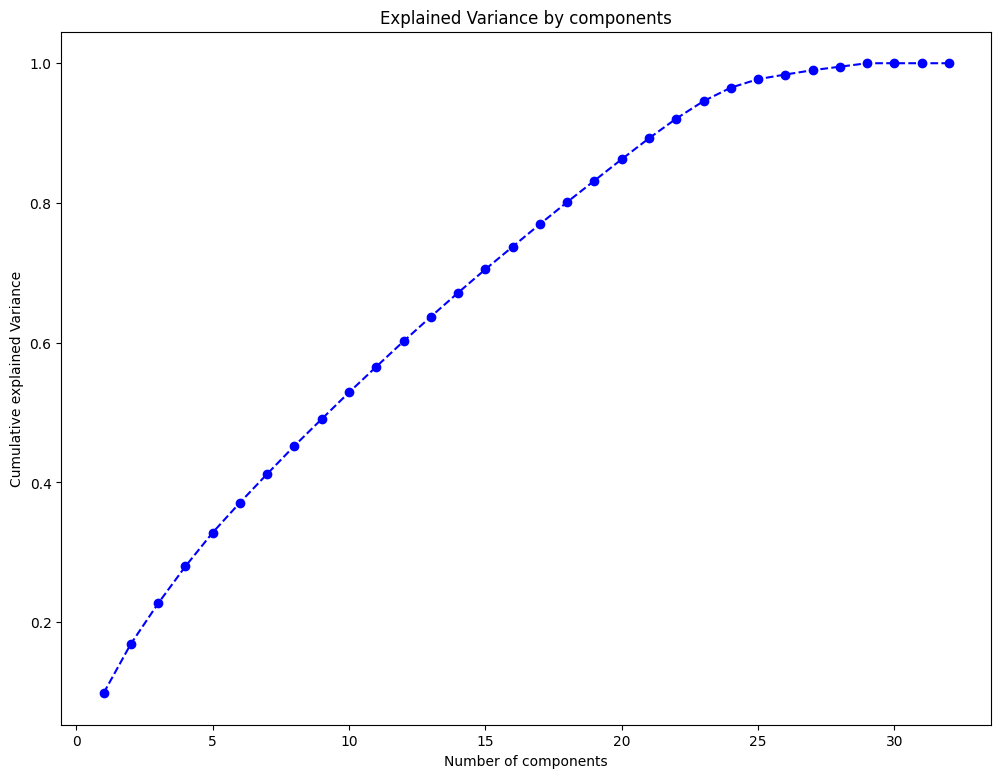

In [12]:
plt.figure(figsize=(12,9))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--', color = 'blue')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained Variance')
plt.show()
# plt.close()

In [13]:
# From the Variance by components graph, I choose to select 22 components to preserve at least 95% of the information.

pca_reduced = PCA(n_components = 22)
pca_reduced.fit(data_scaled_df)
pca_reduced.get_feature_names_out

# We need only the calculated resulting components scores for the elements in our data set:

data_pca = pca_reduced.transform(data_scaled_df)

## Optimal k

Text(0.5, 0.98, 'WSS error, Silhouette score vs K values,\n Pick k where it results in no more significant decrease of WSS,\nAnd where Silhouette is max')

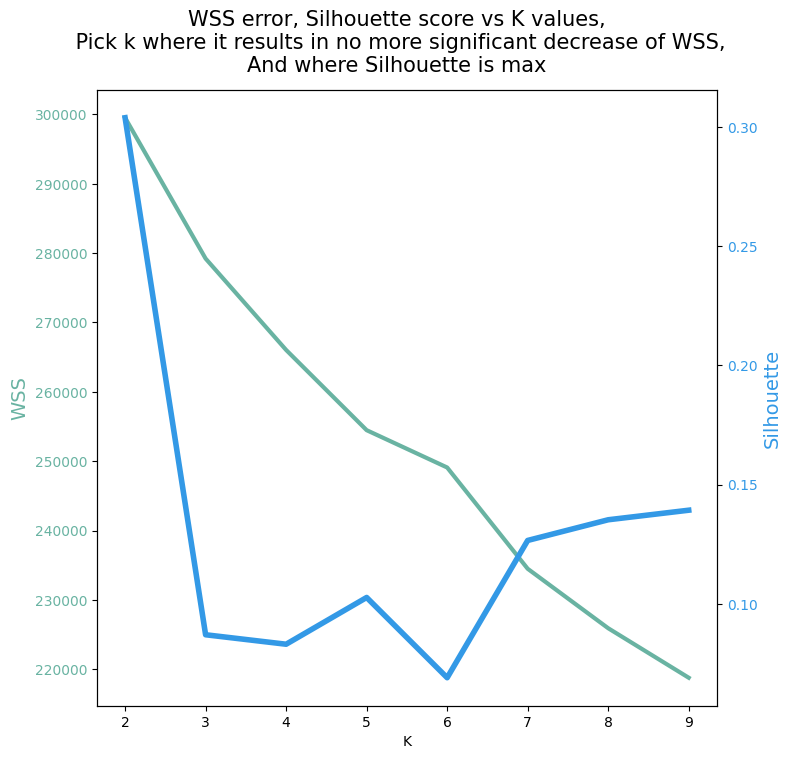

In [14]:
# Optimal k
# Elbow & Silhouette Score 
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt

# WSS error is the Within-cluster sum of squared error

wss = []
silhouette_avg = []
#deciding k range-here the dataset has few rows thats why i am taking k range (1,10)
k_rng = range(2,10)
#perform iterations
for k in k_rng:
    kmeans = KMeans(n_clusters=k, init='random', n_init="auto") # 10 iteration, returns best result for inertia
    kmeans.fit(data_scaled)
    cluster_labels = kmeans.labels_
    
    # Elbow
    wss.append(kmeans.inertia_)
    
    # Silhouette
    silhouette_scr = silhouette_score(data_scaled, cluster_labels)
    # print(f"For n_clusters = {k}\nThe average silhouette_score is :{silhouette_scr}")
    silhouette_avg.append(silhouette_scr)


# plt.title('WSS error vs K values\n Pick k where it will result in no more significant decrease of WSS')
# plt.xlabel('K')
# plt.ylabel('Within-cluster sum of squared error')

COLOR_WSS = "#69b3a2"
COLOR_SILHOUETTE = "#3399e6"
fig, ax1 = plt.subplots(figsize=(8, 8))
# second y axis
ax2 = ax1.twinx()

ax1.plot(k_rng, wss, color=COLOR_WSS, lw=3)
ax2.plot(k_rng, silhouette_avg, color=COLOR_SILHOUETTE, lw=4)

ax1.set_xlabel("K")
ax1.set_ylabel("WSS", color=COLOR_WSS, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_WSS)

ax2.set_ylabel("Silhouette", color=COLOR_SILHOUETTE, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_SILHOUETTE)

fig.suptitle("WSS error, Silhouette score vs K values,\n Pick k where it results in no more significant decrease of WSS,\nAnd where Silhouette is max", fontsize=15)
# plt.close()




## Clustering

##### KMeans

In [15]:
# Define number of clusters
cluster_size = 6

# Clustering
# kmeans = KMeans(n_clusters=cluster_size, init='k-means++', n_init='auto')   # 1 iteration
kmeans = KMeans(n_clusters=cluster_size, init='random', n_init="auto") # 10 iteration, returns best result for inertia
kmeans.fit(data_scaled)
k_labels = kmeans.labels_
k_centroids =  kmeans.cluster_centers_

# Build a df with standardized datas and columns names
data_scaled_df = pd.DataFrame(data = data_scaled,
                                columns = columns_names)

# Build a pd Series from labels and give a column name: cluster
k_labels_S = pd.Series(k_labels, name='cluster')

# Concat Scaled and cluster labelled
data_scaled_labelled_df = pd.concat([data_scaled_df, k_labels_S], axis=1)

data_scaled_labelled_df.head()
data_scaled_labelled_df.shape

(10110, 33)

## Join  Labelled datas with cluster labels to define probabilities

In [16]:
data_clustered = data_scaled_labelled_df.join(attrition_flag)
data_clustered.head()

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,cluster,Attrition_Flag
0,-0.165088,-1.060796,0.503682,0.195793,0.384899,0.764115,-1.328025,0.491862,0.446849,-0.473361,...,2.496349,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008,4,Existing Customer
1,-0.788935,0.942688,1.273948,1.365002,-0.241281,-0.522668,1.643060,-1.317388,-0.584982,1.661984,...,-0.400585,-0.422444,1.357013,-0.351188,0.270855,-0.107736,-0.044521,-0.241008,5,Existing Customer
2,-0.289858,-1.060796,-0.266584,0.195793,0.009191,-0.522668,-1.328025,-0.412763,-0.508293,0.103428,...,-0.400585,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008,0,Existing Customer
3,0.583529,-1.060796,1.273948,0.195793,1.261552,1.407507,-1.328025,0.491862,2.848181,1.351500,...,-0.400585,-0.422444,-0.736913,-0.351188,-3.692014,9.281981,-0.044521,-0.241008,2,Existing Customer
4,-1.787091,-1.060796,-1.807115,1.365002,-1.117933,-1.166060,-0.337663,-0.412763,2.250186,0.286282,...,2.496349,-0.422444,-0.736913,-0.351188,-3.692014,-0.107736,-0.044521,4.149243,2,Existing Customer


In [17]:
probability = data_clustered.groupby('cluster')['Attrition_Flag'].value_counts(normalize=True).mul(100).round(2)
# probability.unstack(level=-1).plot.barh()
probability.astype(str) + '%'

# sns.histplot(probability, x='cluster', hue='Attrition_Flag', multiple='fill')
# probability.head()

cluster  Attrition_Flag   
0        Existing Customer    84.69%
         Attrited Customer    15.31%
1        Existing Customer    83.13%
         Attrited Customer    16.87%
2        Existing Customer    84.37%
         Attrited Customer    15.63%
3        Existing Customer    82.45%
         Attrited Customer    17.55%
4        Existing Customer    85.45%
         Attrited Customer    14.55%
5        Existing Customer    82.76%
         Attrited Customer    17.24%
Name: Attrition_Flag, dtype: object

<Axes: xlabel='cluster', ylabel='prob'>

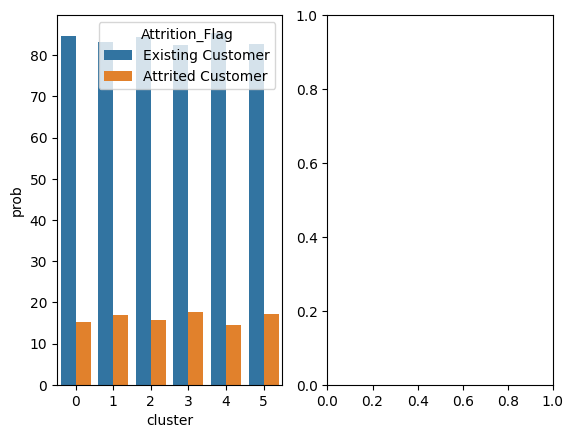

In [18]:
f, axes = plt.subplots(1,2)
proba_df = (data_clustered.groupby('cluster')['Attrition_Flag'].value_counts(normalize=True).mul(100).round(2).rename('prob').reset_index())
proba_df
sns.barplot(x='cluster',y='prob', hue='Attrition_Flag', data=proba_df, ax=axes[0])
# sns.barplot(x='cluster',y='prob', hue='Attrition_Flag',stat="proba", multiple="fill", data=proba_df, ax=axes[1])

## Define profiles from centroids
unstandardize features and define profiles

In [19]:
# df for centroids with columns names
centroid_df = pd.DataFrame(k_centroids, columns=columns_names)
centroid_df

,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.024946,0.088331,-0.043151,0.003489,-0.005040,0.003743,-0.031433,0.009251,-0.444717,0.015480,...,-0.278147,2.158130,-0.400585,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008
1,-0.000244,0.848565,-0.058324,0.011948,-0.017465,0.035596,0.049746,0.005290,-0.072005,-0.077479,...,-0.278147,-0.463364,-0.400585,-0.422444,-0.736913,2.847474,0.270855,-0.107736,-0.044521,-0.241008
2,-0.078779,-0.315651,0.102386,-0.056323,-0.054967,-0.316895,-0.061050,-0.004307,1.905647,0.083936,...,0.181500,-0.027081,0.140232,0.142747,-0.258128,-0.041043,-3.692014,1.468541,0.606871,3.285170
3,0.156910,-1.060796,0.056354,0.019686,0.126649,0.023815,-0.023946,0.091523,1.016769,0.041799,...,3.595222,-0.463364,-0.400585,-0.422444,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008
4,-0.007438,-1.060796,0.087565,0.034038,-0.006110,0.037518,-0.013003,0.013363,0.311828,0.021146,...,-0.278147,-0.463364,0.981449,1.036339,-0.736913,-0.351188,0.270855,-0.107736,-0.044521,-0.241008
5,0.004452,0.791248,-0.060877,-0.024293,-0.000201,0.017781,0.027314,-0.033087,-0.583058,-0.025364,...,-0.278147,-0.463364,-0.400585,-0.422444,1.357013,-0.351188,0.270855,-0.107736,-0.044521,-0.241008


## Plot clusters and centroids

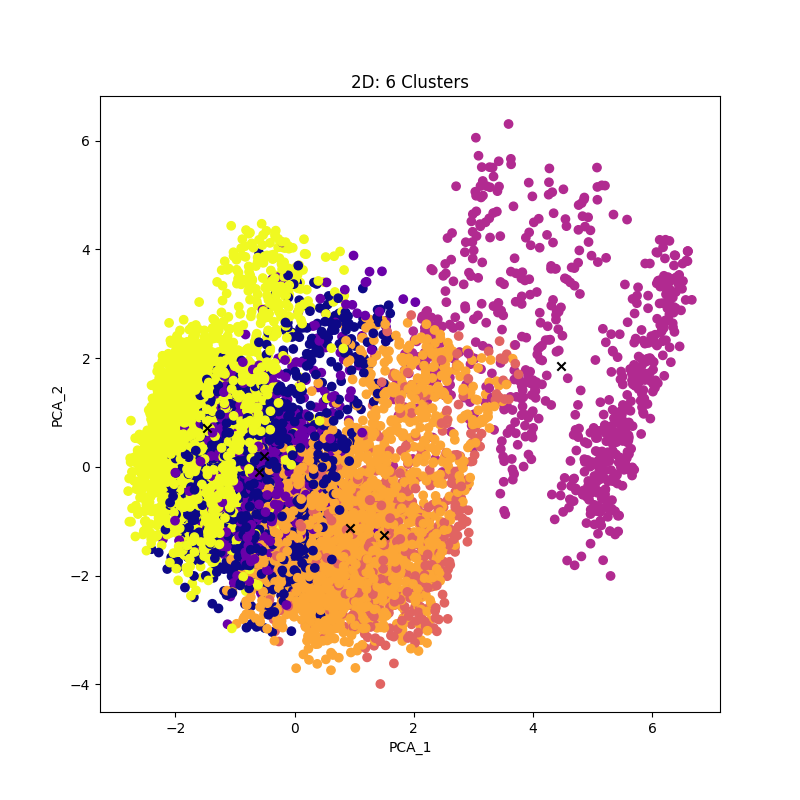

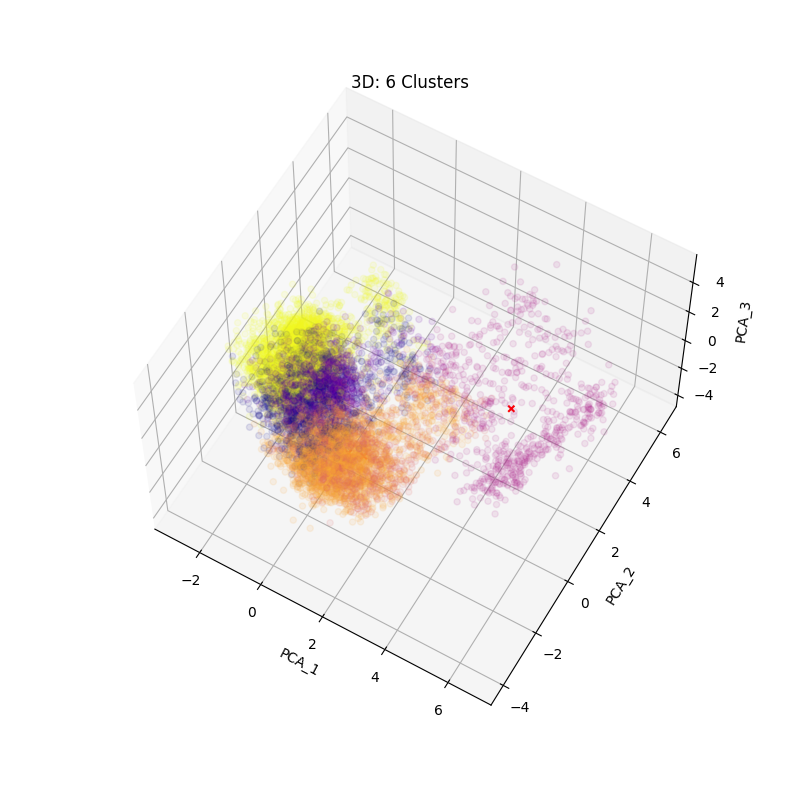

In [27]:
%matplotlib widget
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d    

def plot_clusters(data, labels, centroids):
    pca = PCA(n_components=3)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids) # do not use fit to avoid fitting again and having centroids offsets
    
    # 2D scatter plot with PCA_1 and PCA_2
    fig0 = plt.figure(figsize=(8, 8))
    ax0 = plt.axes()
    ax0.set_title(f"2D: {len(centroid_df)} Clusters")
    ax0.set_xlabel('PCA_1')
    ax0.set_ylabel('PCA_2')
    ax0.scatter(x=data_2d[:,0], y= data_2d[:,1], c=labels, cmap='plasma')
    ax0.scatter(x=centroids_2d[:,0], y= centroids_2d[:,1], marker='x', c="black")
    
    # 3D scatter plot with PCA_1, PCA_2 and PCA_3
    fig = plt.figure(figsize=[8,8])
    fig.canvas.toolbar.visible = True
    ax = plt.axes(projection='3d')
    ax.set_title(f"3D: {len(centroid_df)} Clusters")
    ax.set_xlabel('PCA_1')
    ax.set_ylabel('PCA_2')
    ax.set_zlabel('PCA_3')
    # datas
    xdata = data_2d[:,0]
    ydata = data_2d[:,1]
    zdata = data_2d[:,2]
    # centoids
    xctr = centroids_2d[:,0]
    yctr = centroids_2d[:,1]
    zctr = centroids_2d[:,2]
    # Plot datasets
    ax.scatter3D(xdata, ydata, zdata, c=labels, alpha=0.1, cmap='plasma')
    # Plots centroids
    ax.scatter3D(xctr, yctr, zctr, c='red', alpha=1, marker='x')
    # Set Default view
    ax.elev = 60
    # ax.dist = 
    # ax.azim = 
    


# kmeans.labels_
plot_clusters(data_scaled, k_labels, k_centroids)

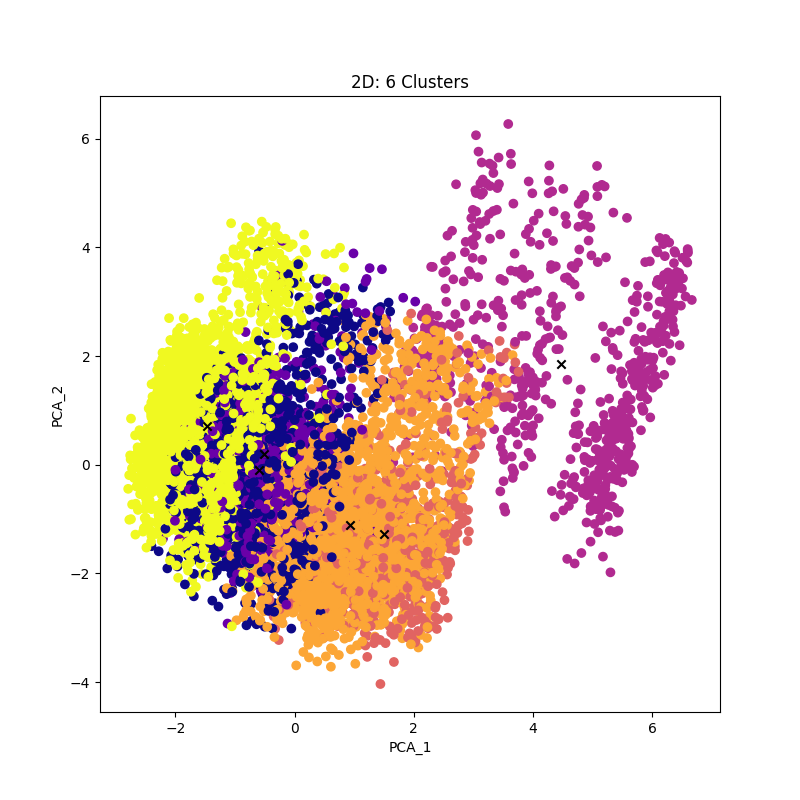

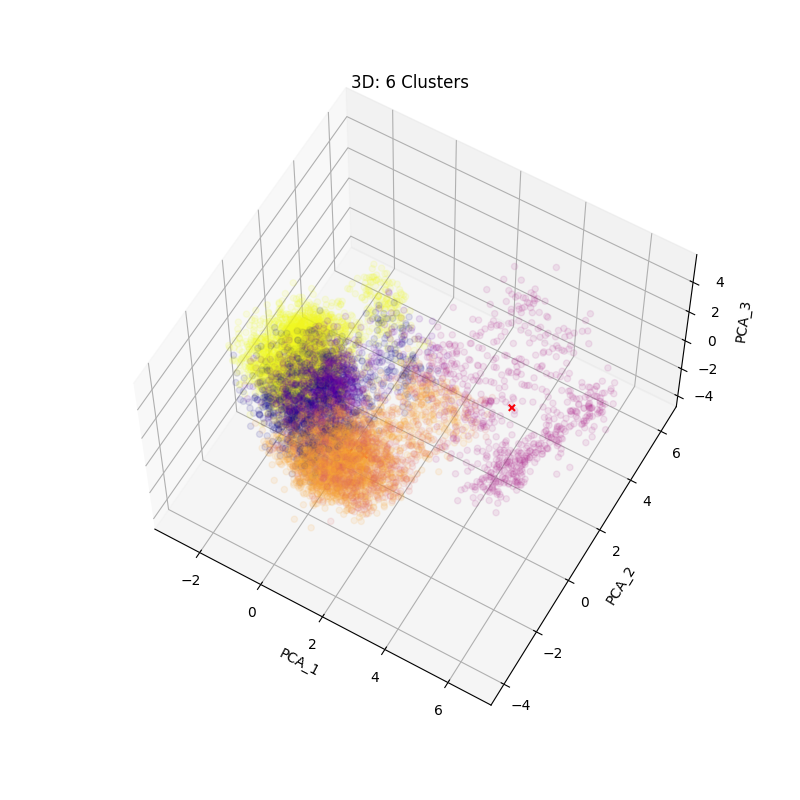

In [28]:
# kmeans.labels_
plot_clusters(data_scaled, k_labels, k_centroids)

In [22]:
# visualise Clustering using seaborn

# sns.set_theme(style="ticks")
# sns.pairplot(data_scaled_labelled_df, hue="cluster")